In [ ]:
# Observations made:

# Capomulin has a very similar rate of effectiveness with Ramicane as they both had similar results 
# found with the box plot and bar graphs that were created.

# Not enough information is present to come to the conclusion if capomulin is more effective in male mice compared to female
# mice. An additional study or data can be used to compare the effectivness of the other regimens by sex.

# According to data represented there is a strong correlation that the heavier the mouse the larger the total volume of the
# mouse's tumor. With smaller mice having less total tumor volume. 

In [692]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [693]:
# Import the data files
mouse_meta_data = pd.read_csv(r"C:\Users\lealr\OneDrive\DU Bootcamp\Matplotlib\Challenge\Pymaceuticals\data\Mouse_metadata.csv")
study_results = pd.read_csv(r"C:\Users\lealr\OneDrive\DU Bootcamp\Matplotlib\Challenge\Pymaceuticals\data\Study_results.csv")

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_meta_data, study_results, how="outer", on="Mouse ID")

mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [694]:
# Checking the number of mice
number_of_mice = len(mouse_study_df['Mouse ID'].unique())
print(number_of_mice, "mice are in this study.")

249 mice are in this study.


In [695]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_df[mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print("Mouse ID: ", duplicates)

Mouse ID:  ['g989']


In [696]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Drug Regimen', 'Sex', 
                                                                      'Age_months',
                                                                      'Weight (g)', 'Timepoint', 
                                                                     'Tumor Volume (mm3)', 'Metastatic Sites'])]['Mouse ID'].iloc[0]


duplicate_mouse_data = mouse_study_df[mouse_study_df['Mouse ID'] == duplicate_mouse_id]

duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [697]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [698]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_mouse_study['Mouse ID'].unique())
print("There are now", number_of_mice, "mice in this study.")

There are now 249 mice in this study.


In [699]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_mean = clean_mouse_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']


regimen_median = clean_mouse_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

regimen_variance = clean_mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance

regimen_stdev = clean_mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_stdev

regimen_sem = clean_mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_sem

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, 
                               "Standard Deviation": regimen_stdev, "SEM": regimen_sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [700]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats2 = clean_mouse_study.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_stats2 = summary_stats2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})
summary_stats2

C:\Users\lealr\AppData\Local\Temp\ipykernel_22244\1716091680.py:2: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats2 = clean_mouse_study.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


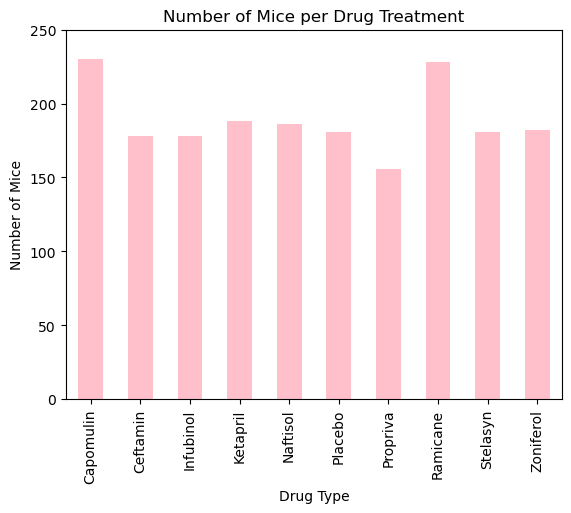

<Figure size 640x480 with 0 Axes>

In [722]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_drugs = clean_mouse_study.groupby(['Drug Regimen']).count()['Mouse ID']

mice_drug_plot = mice_drugs.plot(kind="bar", color="pink")

plt.title('Number of Mice per Drug Treatment')
plt.xlabel('Drug Type')
plt.ylabel('Number of Mice')

# Setting y range to visualize the data better
plt.ylim(0, 250)

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Mice')

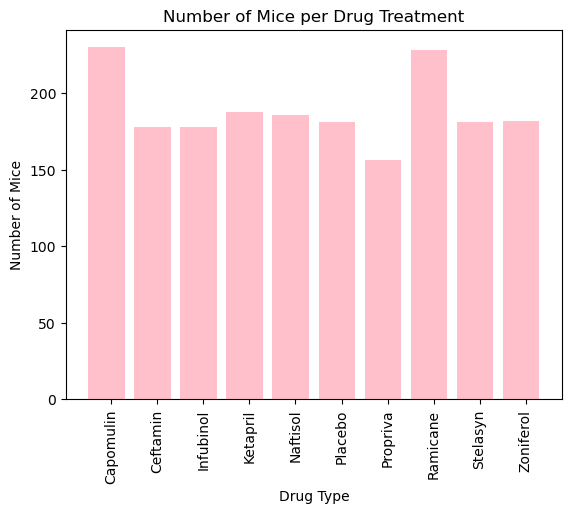

In [721]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create the y axis values that I will use to create the y axis
mice_drugs_pyplot = (clean_mouse_study.groupby(['Drug Regimen'])['Mouse ID'].count().tolist())
mice_drugs_pyplot

# Create x axis variables
x_axis = np.arange(len(mice_drugs))

# Create the bar plot using pyplot
tick_locations = [value + 0.5 for value in x_axis]
plt.xticks(tick_locations, mice_drugs.index, rotation="vertical")
plt.bar(x_axis, mice_drugs_pyplot, align="edge", color="pink")
plt.title("Number of Mice per Drug Treatment")
plt.xlabel("Drug Type")
plt.ylabel("Number of Mice")

Text(0, 0.5, '')

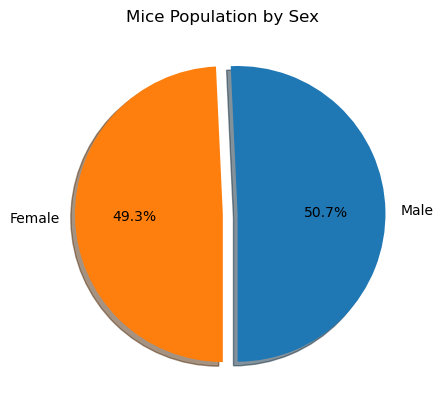

In [720]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Find the difference between male and female mice totals for a percentage of each
mouse_sex = clean_mouse_study['Sex'].value_counts()
explode = (0.1, 0)
mouse_sex_plot = mouse_sex.plot(kind="pie", autopct='%1.1f%%', labels=["Male", "Female"], 
                                     startangle=270, explode=explode, title=("Mice Population by Sex"), shadow=True)

# Removing y label
mouse_sex_plot.set_ylabel("")

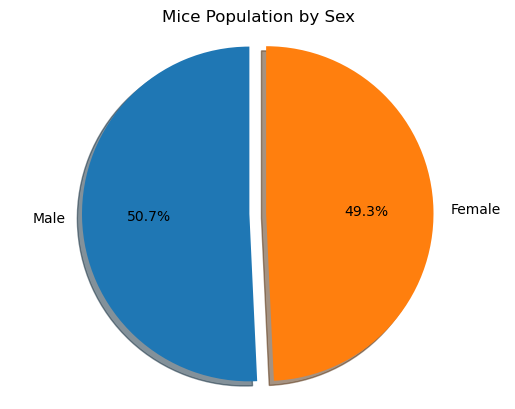

In [704]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Gather the number of male and female mice 
mouse_sex = clean_mouse_study['Sex'].value_counts()

labels = ['Male', 'Female']
plt.pie(mouse_sex, explode=(0.1, 0), labels=labels, autopct="%1.1f%%", shadow=True, 
        startangle=90)
plt.axis('equal')
plt.title('Mice Population by Sex')

plt.show()

In [705]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_mouse_tp = max_timepoint.merge(clean_mouse_study, on=["Mouse ID", "Timepoint"], how="left")
clean_mouse_tp

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [706]:
clean_mouse_study['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [707]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    tumor_data = clean_mouse_tp.loc[clean_mouse_tp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # adding the subset 
    tumor_vol_data.append(tumor_data)
    
    # Find upper and lower bounds to identify outliers for each drug treatment
    quartiles = tumor_data.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    print(f'IQR for {drug}: {iqr}')
    
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')

    
    # The outliers
    outliers_count = (tumor_data.loc[(tumor_data >= upper_bound) | 
                                  (tumor_data <= lower_bound)]).count()
    print(f'The outliers for {drug}: {outliers_count}')
    print("-------------------------------------------------------------")

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
The outliers for Capomulin: 0
-------------------------------------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
The outliers for Ramicane: 0
-------------------------------------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
The outliers for Infubinol: 1
-------------------------------------------------------------
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
The outliers for Ceftamin: 0
-------------------------------------------------------------


C:\Users\lealr\AppData\Local\Temp\ipykernel_22244\2851193655.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatments)


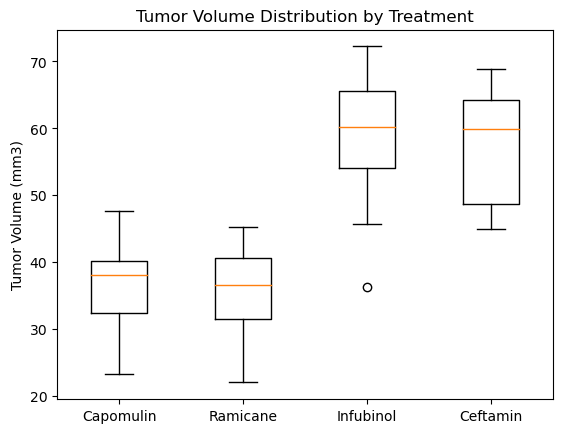

In [713]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group
# Create a figure and axis object
fig, ax = plt.subplots()
ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treatments)

box_plot_data = []

# Creating for loop for boxplot
for drug in treatments:
    box_plot_data.append(list(tumor_data))

ax.boxplot(tumor_vol_data, labels=treatments)

plt.show()

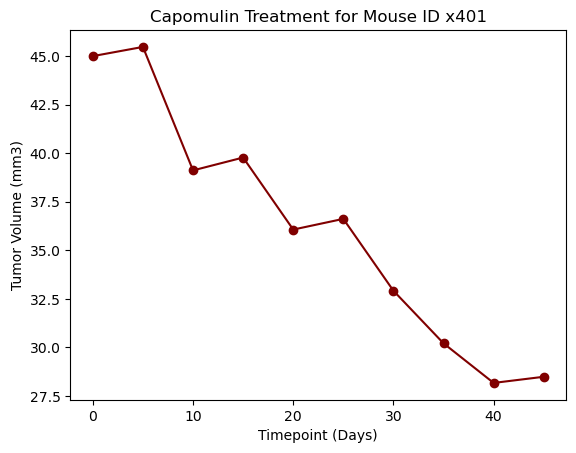

<Figure size 640x480 with 0 Axes>

In [709]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Compare a mouse's tumor volume to that of a mouse with a Capomulin treatment
capomulin_treatment = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin",:]


# Using a mouse I see on the list treated with Capomulin (Mouse ID = x401)
mouse_capo = capomulin_treatment.loc[capomulin_treatment["Mouse ID"] == "x401",:]
mouse_capo

# Plot the data
plt.plot(mouse_capo["Timepoint"], mouse_capo["Tumor Volume (mm3)"], marker="o", color="maroon")

plt.title("Capomulin Treatment for Mouse ID x401")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

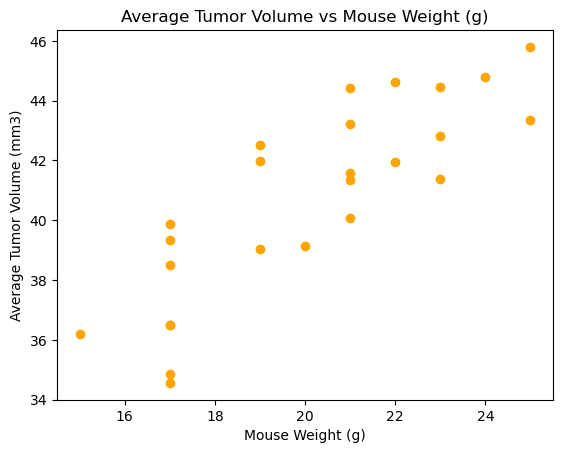

In [710]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_capo = capomulin_treatment.groupby(['Mouse ID']).mean()

# Plot the x and y variables to create the scatter plot

x = weight_capo['Weight (g)']
y = weight_capo['Tumor Volume (mm3)']

plt.plot(x, y, 'o', color="orange")


# Add titles and labels
plt.title("Average Tumor Volume vs Mouse Weight (g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


The correlation between the weight(g) and average tumor volume found in mice treated with the Capomulin regimen is: 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

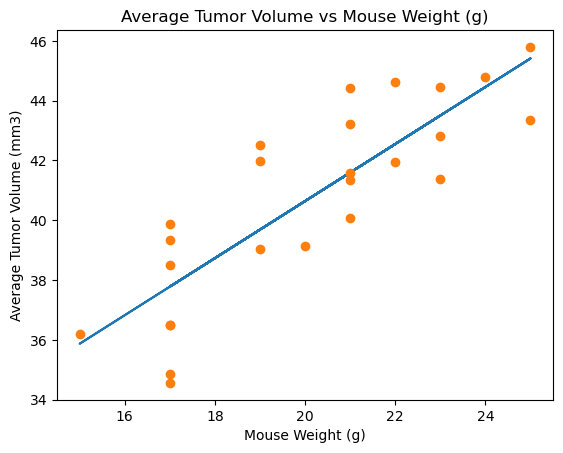

In [711]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Pearson Correlation coefficent with SCIPY
x_value = weight_capo["Weight (g)"]
y_value = weight_capo["Tumor Volume (mm3)"]

correlation = st.pearsonr(x, y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regression_line = x * slope + intercept




print(f"The correlation between the weight(g) and average tumor volume found in mice treated with the Capomulin regimen is: {round(correlation[0],2)}")

plt.plot(x, regression_line)
plt.plot(x, y, "o")
# Add titles and labels
plt.title("Average Tumor Volume vs Mouse Weight (g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")